In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
%matplotlib inline

In [ ]:
X,y = make_blobs(n_samples = 1000, centers = 3, n_features = 2, random_state = 23 )

In [ ]:
X.shape

(1000, 2)

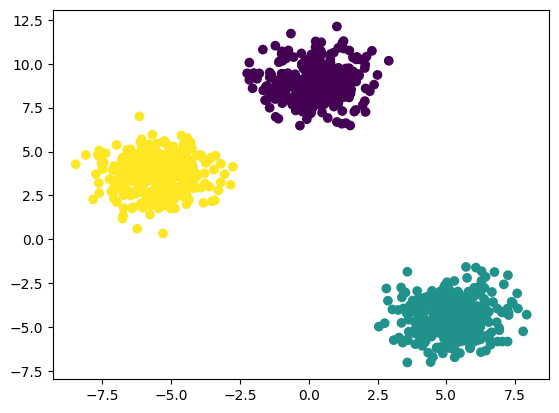

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(
    X, y, test_size = 0.33, random_state = 42
)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
## Manual Process
## Elbow Method to select the K value

wcss = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, init = 'k-means++')
  kmeans.fit(X_train)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
wcss

[34827.57682552021,
 7935.437286145418,
 1319.2730531585612,
 1170.7100630981827,
 991.9047984051339,
 853.5577772887609,
 754.6710246538876,
 663.0166879435986,
 580.5563629709342,
 536.610614725005]

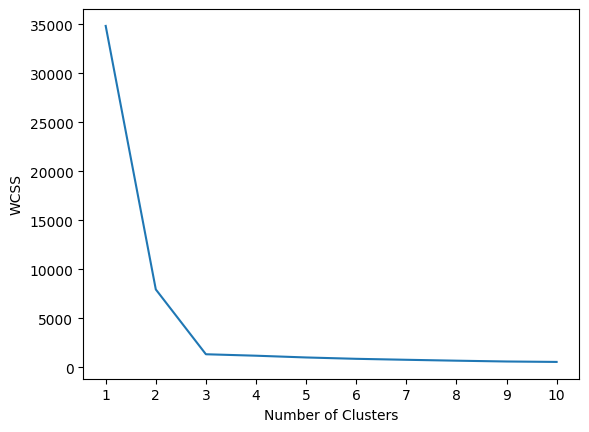

In [ ]:
# plot the elbow curve

plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, init="k-means++")
y_labels = kmeans.fit_predict(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
y_labels

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 1, 2,
       2, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 2, 2, 2, 1, 1, 0, 0, 1, 0, 0,
       1, 2, 2, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 1, 0, 2, 2,
       2, 2, 1, 0, 2, 1, 0, 2, 0, 2, 1, 1, 1, 1, 0, 0, 2, 0, 2, 2, 0, 2,
       0, 2, 0, 2, 0, 1, 0, 0, 1, 2, 2, 2, 2, 1, 2, 0, 1, 1, 2, 0, 2, 0,
       1, 2, 0, 1, 1, 1, 1, 2, 0, 2, 0, 0, 2, 1, 0, 1, 0, 2, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 0, 1, 2, 2, 1, 0, 2, 2, 2, 1, 2, 0,
       0, 1, 0, 2, 2, 0, 2, 1, 2, 2, 1, 1, 1, 0, 1, 1, 0, 2, 1, 1, 2, 1,
       2, 0, 2, 1, 2, 1, 0, 1, 1, 1, 2, 0, 2, 1, 0, 2, 1, 0, 0, 2, 2, 0,
       2, 2, 2, 2, 0, 1, 0, 0, 2, 1, 2, 2, 0, 1, 0, 1, 0, 1, 2, 0, 1, 2,
       1, 0, 0, 1, 1, 2, 1, 0, 2, 2, 0, 2, 1, 0, 2, 1, 0, 0, 0, 0, 2, 0,
       0, 1, 0, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1, 0, 2, 2, 1, 1, 1, 2, 2, 0,
       0, 0, 2, 2, 0, 2, 1, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 1, 2, 1, 2,
       2, 1, 1, 0, 0, 0, 1, 2, 1, 2, 0, 0, 0, 0, 1,

In [ ]:
X_test_labels = kmeans.predict(X_test)

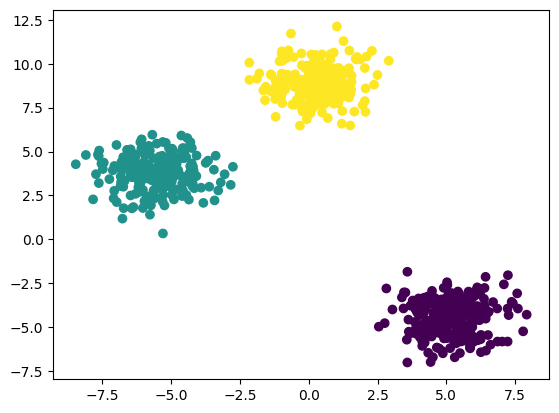

In [ ]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

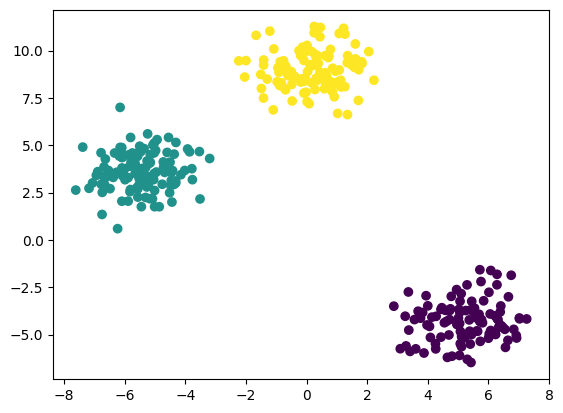

In [ ]:
plt.scatter(X_test[:,0],X_test[:,1],c=X_test_labels)

In [ ]:
# Knee locator library (This library helps us to automate the process of finding the correct value of K)
!pip install kneed

In [ ]:
from kneed import KneeLocator

In [ ]:
kl = KneeLocator(range(1,11),wcss,curve='convex', direction='decreasing')
kl.elbow

3

In [ ]:
# Performance metrics
# Silhoutte score
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_coefficients = []
for k in range(2,11):
  kmeans = KMeans(n_clusters=k,init="k-means++")
  kmeans.fit(X_train)
  score=silhouette_score(X_train,kmeans.labels_)
  silhouette_coefficients.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

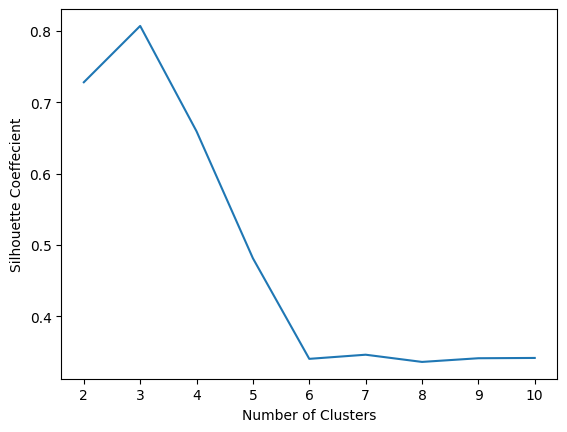

In [ ]:
# plotting the slhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coeffecient")
plt.show()